<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [93]:
import numpy as np

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(URL)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset

In [9]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [15]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [17]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

## Task 2: Generate Descriptive Statistics and Visualizations

#### 1. For the "Median value of owner-occupied homes" provide a boxplot

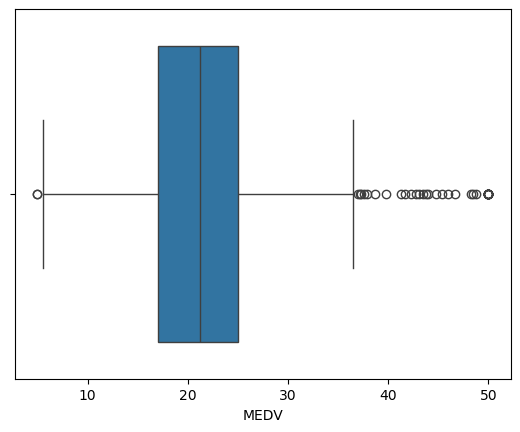

In [22]:
sns.boxplot(x='MEDV', data=boston_df)
pyplot.show()

#### 2. Provide a histogram for the Charles river variable

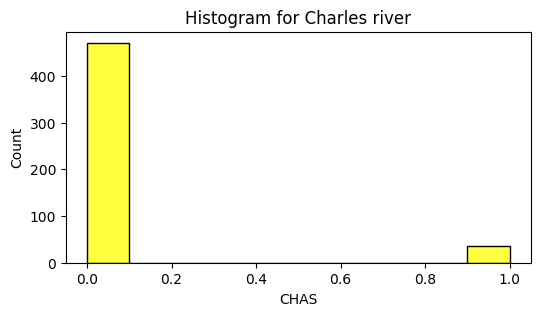

In [31]:
pyplot.figure(figsize=(6,3))
sns.histplot(x=boston_df.CHAS, color='yellow')
pyplot.title("Histogram for Charles river")
pyplot.show()

Majority tracts are not bound by Charles River

#### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [47]:
boston_df.loc[(boston_df['AGE']<=35,'Age_Group')] = 'younger_than_35'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'Age_Group'] = 'btwn_35_and_70'
boston_df.loc[(boston_df['AGE']>=70,'Age_Group')] = 'older_than_70'

In [48]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,btwn_35_and_70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,older_than_70
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,btwn_35_and_70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,btwn_35_and_70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,btwn_35_and_70


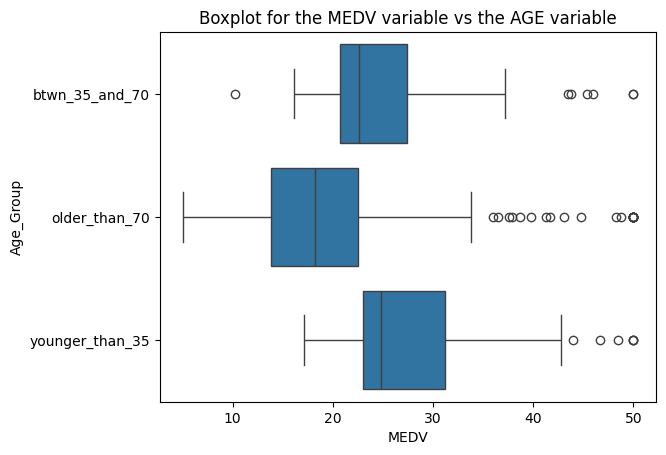

In [51]:
sns.boxplot(x='MEDV', y='Age_Group', data=boston_df)
pyplot.title("Boxplot for the MEDV variable vs the AGE variable")
pyplot.show()

35 years or younger group pays the highest median house price while above 70s are shifting to cheaper houses

#### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

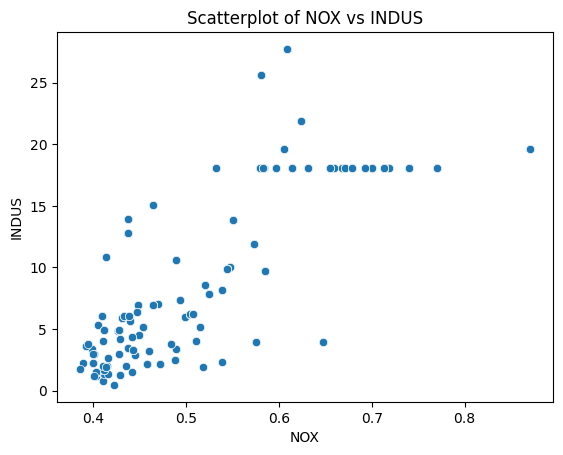

In [55]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatterplot of NOX vs INDUS')
pyplot.show()

There is a linear relationship until NOX reaches about 0.6

#### 5. Create a histogram for the pupil to teacher ratio variable

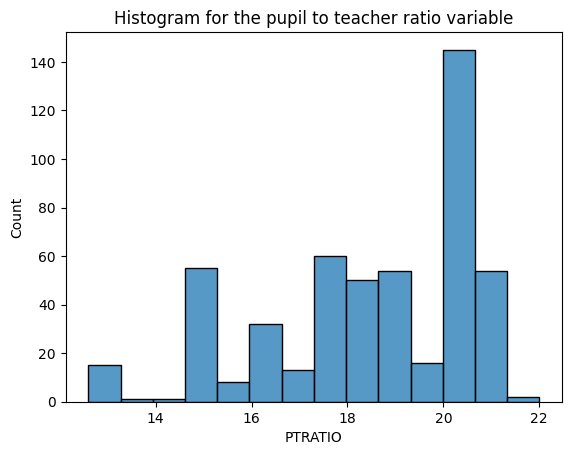

In [59]:
sns.histplot(x='PTRATIO', data=boston_df)
pyplot.title('Histogram for the pupil to teacher ratio variable')
pyplot.show()

High ratio between 20 to 21

## Task 3: Use the appropriate tests to answer the questions provided.

#### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [69]:
# median of houses bounded by charles river vs median of houses not bounded by charles river
# CHAS = 1, MEDV v/s CHAS = 0, MEDV
# Ho = No significant difference
# H1 = Significant difference exists
# a = 0.05

In [70]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [68]:
sample_df = boston_df[boston_df['CHAS']==1]
sample_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
142,142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,26.82,13.4,older_than_70
152,152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,12.12,15.3,older_than_70
154,154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,15.12,17.0,older_than_70
155,155,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,15.02,15.6,older_than_70
160,160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,5.50,27.0,older_than_70


In [71]:
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [72]:
#p-value < 0.05 so unequal variance

In [75]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'], equal_var=False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since p-value is less than alpha value of 0.05, we reject null hypothesis, there is a significant difference

#### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [78]:
boston_df.loc[(boston_df['AGE']<=35,'Age_Group')] = 'younger_than_35'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'Age_Group'] = 'btwn_35_and_70'
boston_df.loc[(boston_df['AGE']>=70,'Age_Group')] = 'older_than_70'

In [79]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,btwn_35_and_70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,older_than_70
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,btwn_35_and_70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,btwn_35_and_70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,btwn_35_and_70


In [80]:
young = boston_df[boston_df['Age_Group']=='younger_than_35']['MEDV']
mid = boston_df[boston_df['Age_Group']=='btwn_35_and_70']['MEDV']
old = boston_df[boston_df['Age_Group']=='older_than_70']['MEDV']

In [81]:
f_stats, p_value = scipy.stats.f_oneway(young,mid,old,axis=0)

In [82]:
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


Since p-value more than alpha value of 0.05, we failed to reject null hypothesis since there is NO statistical significance.

#### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [85]:
pearson,p_value = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

In [87]:
print("Pearson Coefficient={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient=0.7636514469209192, P-value=7.913361061210442e-98


Since the p-value < 0.05, we reject the Null hypothesis ---> there exists a relationship between Nitric Oxide and non-retail business acres per town.

#### 4.What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [88]:
x=boston_df['MEDV']
y=boston_df['DIS']

In [89]:
x = sm.add_constant(x)

In [90]:
results = sm.OLS(y,x).fit()


In [91]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.21e-08
Time:                        21:07:33   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
Pearson_coeff = np.sqrt(0.062)
Pearson_coeff

0.24899799195977465

The square root of R-squared is 0.248 ----> weak correlation

In [96]:
boston_df.corr()

<ipython-input-96-53d3c4ecab91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  boston_df.corr()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
CRIM,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
